In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Upload clean dataset 

In [2]:
data = pd.read_csv("clean_customers.csv")
data = data.drop(columns = "Unnamed: 0")

In [3]:
data

,CLIENTNUM,Current_customer,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Current_customer_Num
0,7152,y,45,1,3,3,1,2,0,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,9812,y,49,0,5,2,2,4,0,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,3053,y,51,1,3,2,1,3,0,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,7204,y,40,0,4,3,3,4,0,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,501,y,40,1,3,5,1,2,0,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,7516,y,50,1,2,2,2,1,0,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1
10123,1235,n,41,1,2,6,0,1,0,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0
10124,4406,n,44,0,1,3,1,4,0,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0
10125,4840,n,30,1,2,2,3,1,0,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0


### Correlation matrix for feature selection

With the correlation matrix we can check which attributes affect the target and whether there are dependent attributes in the dataset

/var/folders/70/yf0pv83n6fx2py7ghkhq9pqr0000gn/T/ipykernel_19958/329475265.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()


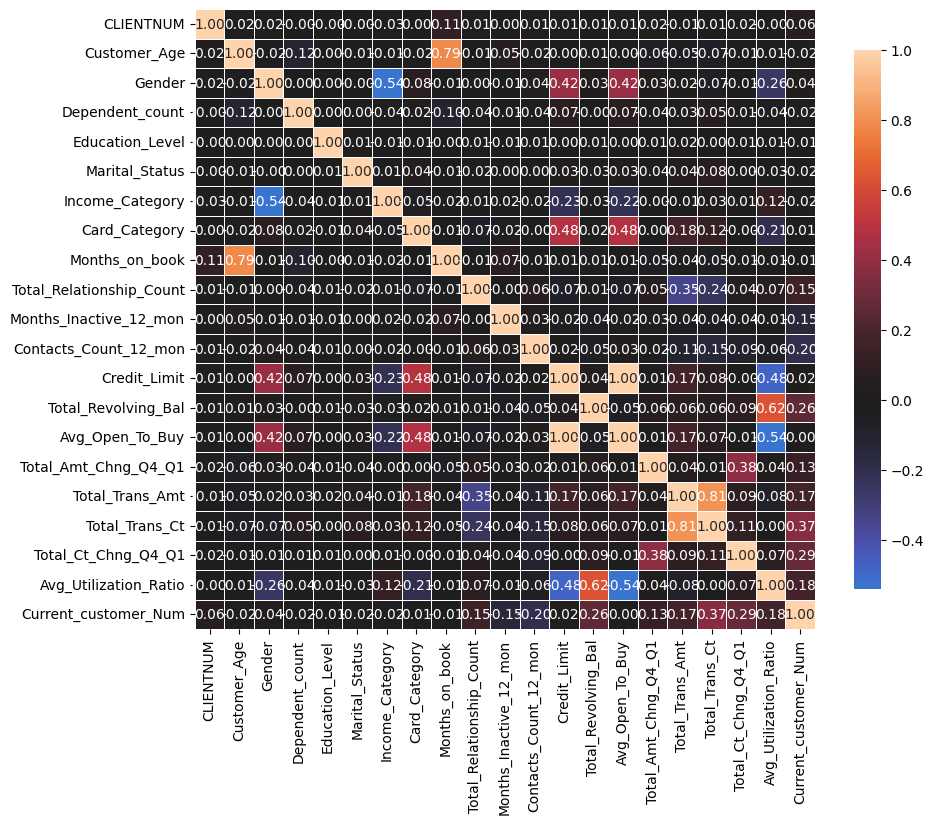

In [4]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(data)

Therefore, we see that the target is influenced by such attributes as:
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Total_Revolving_Bal
- Contacts_Count_12_mon
- Avg_Utilization_Ratio
- Total_Trans_Amt
- Total_Relationship_Count
- Months_Inactive_12_mon

At the same time Total_Trans_Amt and Total_Trans_Ct have hight correlation, therefore we exclude Total_Trans_Amt attribute from modeling (because it affect less to the target).

For modeling we have 7 attributes.

### Feature selection made with SelectKBest function

In [17]:
y = data["Current_customer_Num"]
X = data.drop(['CLIENTNUM','Current_customer_Num', 'Current_customer'],axis=1)

In [19]:
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit_transform(X, y)
cols = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]

In [20]:
features_df_new

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,5,1,3,777,1144,42,1.625,0.061
1,6,1,2,864,1291,33,3.714,0.105
2,4,1,0,0,1887,20,2.333,0.000
3,3,4,1,2517,1171,20,2.333,0.760
4,5,1,0,0,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...
10122,3,2,3,1851,15476,117,0.857,0.462
10123,4,2,3,2186,8764,69,0.683,0.511
10124,5,3,4,0,10291,60,0.818,0.000
10125,4,3,3,0,8395,62,0.722,0.000


We obtain the same result

### Forming dataset with selected features

In [21]:
selected_data = data[['Total_Trans_Ct',
                    'Total_Ct_Chng_Q4_Q1',
                    'Total_Revolving_Bal',
                    'Contacts_Count_12_mon',
                    'Avg_Utilization_Ratio',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Current_customer']]

In [22]:
selected_data

,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Contacts_Count_12_mon,Avg_Utilization_Ratio,Total_Relationship_Count,Months_Inactive_12_mon,Current_customer
0,42,1.625,777,3,0.061,5,1,y
1,33,3.714,864,2,0.105,6,1,y
2,20,2.333,0,0,0.000,4,1,y
3,20,2.333,2517,1,0.760,3,4,y
4,28,2.500,0,0,0.000,5,1,y
...,...,...,...,...,...,...,...,...
10122,117,0.857,1851,3,0.462,3,2,y
10123,69,0.683,2186,3,0.511,4,2,n
10124,60,0.818,0,4,0.000,5,3,n
10125,62,0.722,0,3,0.000,4,3,n


### Split data for train and test sets

In [23]:
df_train, df_test = train_test_split(selected_data, test_size=0.2, random_state=42)

### Undersampling balancing

In [27]:
# function for undersampling

def undersampling(data):
    us_data = data.sample(frac=1, random_state=4)
    length = len(data[data['Current_customer'] == 'n'])
    exist = us_data.loc[us_data['Current_customer'] == 'y'][:length]
    attr = us_data.loc[us_data['Current_customer'] == 'n']

    normal_distributed_df = pd.concat([exist, attr])

    # Shuffle dataframe rows
    us_data2 = normal_distributed_df.sample(frac=1, random_state=42)

    return us_data2


In [28]:
us_train_data = undersampling(df_train)
us_test_data = undersampling(df_test)

In [29]:
print('Train\n', us_train_data.groupby('Current_customer').size())
print('Test\n',us_test_data.groupby('Current_customer').size())

Train
 Current_customer
n    1300
y    1300
dtype: int64
Test
 Current_customer
n    327
y    327
dtype: int64


#### Save undersampled datasets

In [30]:
us_train_data.to_csv('us_train_data.csv', ',')
us_test_data.to_csv('us_test_data.csv', ',')


### Oversampling balancing

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(credit_df.drop('Class', axis=1), credit_df['Class'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = normalized_df.columns